# SciPy

| Subpackage  | Description                                            |
|-------------|--------------------------------------------------------|
| cluster     | Clustering algorithms                                  |
| constants   | Physical and mathematical constants                    |
| fftpack     | Fast Fourier Transform routines                        |
| integrate   | Integration and ordinary differential equation solvers |
| interpolate | Interpolation and smoothing splines                    |
| io          | Input and Output                                       |
| linalg      | Linear algebra                                         |
| ndimage     | N-dimensional image processing                         |
| odr         | Orthogonal distance regression                         |
| optimize    | Optimization and root-finding routines                 |
| signal      | Signal processing                                      |
| sparse      | Sparse matrices and associated routines                |
| spatial     | Spatial data structures and algorithms                 |
| special     | Special functions                                      |
| stats       | Statistical distributions and functions                |

In [38]:
import numpy as np
np.random.seed(0)
import scipy as sc
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
x = np.random.randn(1_000_000)

print(x[:10])

[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985 ]


| | $\mathcal {N}$($\mu$, $\sigma^{2}$) 	|  	|  	|
|-	|-	|-	|-	|
| Variance 	| $\sigma^{2}$ 	|  	|  	|
| Skewness 	| $0$ 	|  	|  	|
| Ex. kurtosis 	| $0$ 	|  	|  	|  
  

| | $\mathcal {N}$(0, 1) 	|  	|  	|
|-	|-	|-	|-	|
| Variance 	| $1$ 	|  	|  	|
| Skewness 	| $0$ 	|  	|  	|
| Ex. kurtosis 	| $0$ 	|  	|  	|

In [40]:
print(f"var: {np.var(x)}")
print(f"skew: {scipy.stats.skew(x)}")
print(f"kurtosis: {scipy.stats.kurtosis(x)}")

print(f"2-nd moment: {scipy.stats.moment(x, moment=2)}")
print(f"3-rd moment: {scipy.stats.moment(x, moment=3)}")
print(f"4-th moment: {scipy.stats.moment(x, moment=4)}")

var: 0.9998426582229105
skew: -0.001361127398332973
kurtosis: -0.0001276636003777476
2-nd moment: 0.9998426582229105
3-rd moment: -0.0013608061676640042
4-th moment: 2.998928400176865


```python
class scipy.stats.rv_continuous(
    momtype=1,
    a=None,
    b=None,
    xtol=1e-14,
    seed=None
)`
```

A generic continuous random variable class meant for subclassing.

rv_continuous is a base class to construct specific distribution classes and instances for continuous random variables. It cannot be used directly as a distribution.

| rvs 	| Random variates of given type. 	|
|-	|-	|
| pdf 	| Probability density function at x of the given RV. 	|
| logpdf 	| Log of the probability density function at x of the given RV. 	|
| cdf 	| Cumulative distribution function of the given RV. 	|
| logcdf 	| Log of the cumulative distribution function at x of the given RV. 	|
| moment 	| n-th order non-central moment of distribution. 	|
| stats 	| Some statistics of the given RV. 	|
| entropy 	| Differential entropy of the RV. 	|
| expect 	| Calculate expected value of a function with respect to the distribution by numerical integration. 	|
| median 	| Median of the distribution. 	|
| mean 	| Mean of the distribution. 	|
| std 	| Standard deviation of the distribution. 	|
| var 	| Variance of the distribution. 	|
| interval 	| Confidence interval with equal areas around the median. 	|
| fit 	| Return MLEs for shape (if applicable), location, and scale parameters from data. 	|

In [41]:
class gaussian_gen(scipy.stats.rv_continuous):
    "Gaussian distribution"
    def _pdf(self, x):
        return np.exp(-x**2 / 2.) / np.sqrt(2.0 * np.pi)

gaussian = gaussian_gen(name='gaussian')

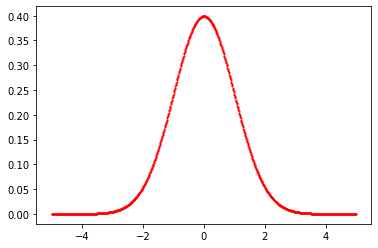

In [58]:
xi = np.linspace(-5.0, 5.0, 1000)

pdf_x = gaussian.pdf(xi)

fig, ax = plt.subplots(1, 1)
ax.plot(xi, pdf_x, 'ro', ms=1, mec='r')
plt.show();

In [48]:
print(gaussian.mean())
print(gaussian.var())
print(gaussian.std())
print(gaussian.entropy())

-5.955875168377274e-16
0.9999999993068875
0.9999999996534438
1.4189385332046731


A generic discrete random variable class meant for subclassing.

rv_discrete is a base class to construct specific distribution classes and instances for discrete random variables. It can also be used to construct an arbitrary distribution defined by a list of support points and corresponding probabilities.

| rvs 	| Random variates of given type. 	|
|-	|-	|
| pmf 	| Probability mass function at k of the given RV. 	|
| logpmf 	| Log of the probability mass function at k of the given RV. 	|
| cdf 	| Cumulative distribution function of the given RV. 	|
| logcdf 	| Log of the cumulative distribution function at k of the given RV. 	|
| moment 	| n-th order non-central moment of distribution. 	|
| stats 	| Some statistics of the given RV. 	|
| entropy 	| Differential entropy of the RV. 	|
| expect 	| Calculate expected value of a function with respect to the distribution for discrete distribution by numerical summation. 	|
| median 	| Median of the distribution. 	|
| mean 	| Mean of the distribution. 	|
| std 	| Standard deviation of the distribution. 	|
| var 	| Variance of the distribution. 	|
| interval 	| Confidence interval with equal areas around the 	|

In [45]:
xk = np.arange(7)
pk = (0.1, 0.2, 0.3, 0.1, 0.1, 0.0, 0.2)

custm = scipy.stats.rv_discrete(name='custm', values=(xk, pk))

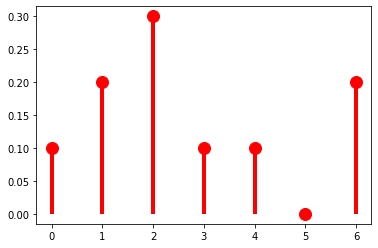

In [46]:
pmf_x = custm.pmf(xk)

fig, ax = plt.subplots(1, 1)
ax.plot(xk, custm.pmf(xk), 'ro', ms=12, mec='r')
ax.vlines(xk, 0, custm.pmf(xk), colors='r', lw=4)
plt.show();

In [47]:
print(custm.mean())
print(custm.var())
print(custm.std())
print(custm.entropy())

2.7
3.8099999999999987
1.9519221295943132
1.6957425341696346
